In [1]:
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from scripts.data_cleaner import filter_top_cpv_categories

In [2]:
df = pd.read_csv('../data/data_clean.csv')

/var/folders/nj/s1c8f0tj3ksfjdg8xyxr6rdc0000gn/T/ipykernel_80807/546279234.py:1: DtypeWarning: Columns (38) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/data_clean.csv')


In [4]:
df = filter_top_cpv_categories(df, top_n=150, cpv_column='codeCPV_3')

Filtered from 392 to 150 CPV categories, keeping 279174 rows out of 286850


In [5]:
df.drop(df[df['montant'] > 999999].index, inplace=True)
df.shape

(238163, 38)

In [6]:
y = np.log1p(df['montant'])
y.head()

0    11.292279
1    10.882925
4    13.235694
5    11.350889
6    12.044412
Name: montant, dtype: float64

In [7]:
bins = np.linspace(y.min(), y.max(), 10)

# Créer les étiquettes correspondantes
labels = list(range(1, len(bins)))

# Ajouter la colonne fourchette_de_prix
df['bins'] = pd.cut(y, bins=bins, labels=labels, include_lowest=True, right=True)

df.shape

(238163, 39)

In [9]:
df['bins'] = df['bins'].astype('int')

In [26]:
df['bins'].value_counts(normalize=True)

bins
4    0.171731
3    0.162523
5    0.149511
6    0.140286
7    0.108610
2    0.090451
8    0.087537
9    0.062995
1    0.026356
Name: proportion, dtype: float64

<Axes: xlabel='bins', ylabel='Count'>

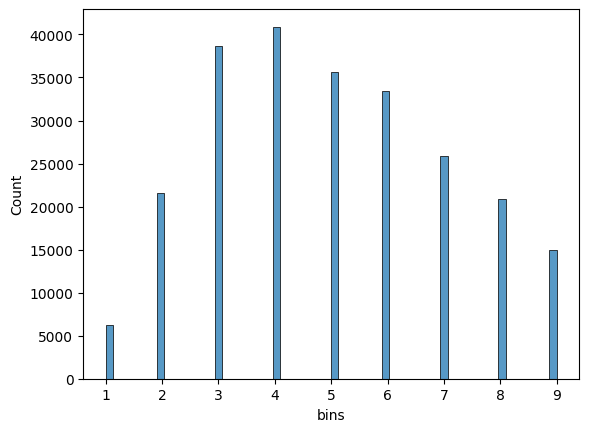

In [25]:
sns.histplot(df['bins'])

In [17]:
min(df['montant'][df['bins']>=9])

647491.7

In [18]:
max(df['montant'][df['bins']==1])

30883.66